# Djikstra's algorithm

In [121]:
class Graph:
  def __init__(self, nodes, connections, weights):
    self.nodes = nodes;               #integer n = number of nodes
    self.connections = connections;   #list
    self.weights = weights;           #list
  
  def djikstra(self, start, end):
    '''Solves a given graph problem using Djikstra's method.
      INPUT: start(int) = starting node
              end(int) = destination node

      OUTPUT: minimum_distance(int) = minimum distance between starting and destination nodes
              optimal_path(list) = path corresponding to the minimum distance
    '''
    # Initialize a list with distances of all the nodes w.r.t. starting node
    distance_from_start = [] 
    for i in range(self.nodes):
      if i == start:
        distance_from_start.append(0)
      else:
        distance_from_start.append(float('inf'))
    
    optimal_connections = [0]*self.nodes                                          # List which records connections to each node serially (element 0 -> node 0) which would lead to start node.  
    nodes_to_be_checked = [start]
    while(all(self.connections)):
      for n in nodes_to_be_checked:
        connected_nodes = self.connections[n]
        connected_weights = self.weights[n]
        for w,c in zip(connected_weights, connected_nodes):                       # Evaluating the minimum distances of each node from the source node
          if distance_from_start[c] > w + distance_from_start[n]:
            distance_from_start[c] = w + distance_from_start[n]
            optimal_connections[c] = n
          #print(self.connections[c])

          pos = self.connections[c].index(n)                                      # Eliminating the node which has already been evaluated
          del self.weights[c][pos]
          del self.connections[c][pos]

        #print(optimal_connections)
        nodes_to_be_checked = connected_nodes                                     # Moving on the the next set of connected nodes
      
    trace_back = end                                                              # Tracing back the optimal path based on optimal connections
    optimal_path = [start]
    while(trace_back != start):
      optimal_path.insert(1, trace_back)
      trace_back = optimal_connections[trace_back]

    return distance_from_start[end], optimal_path

# Example:
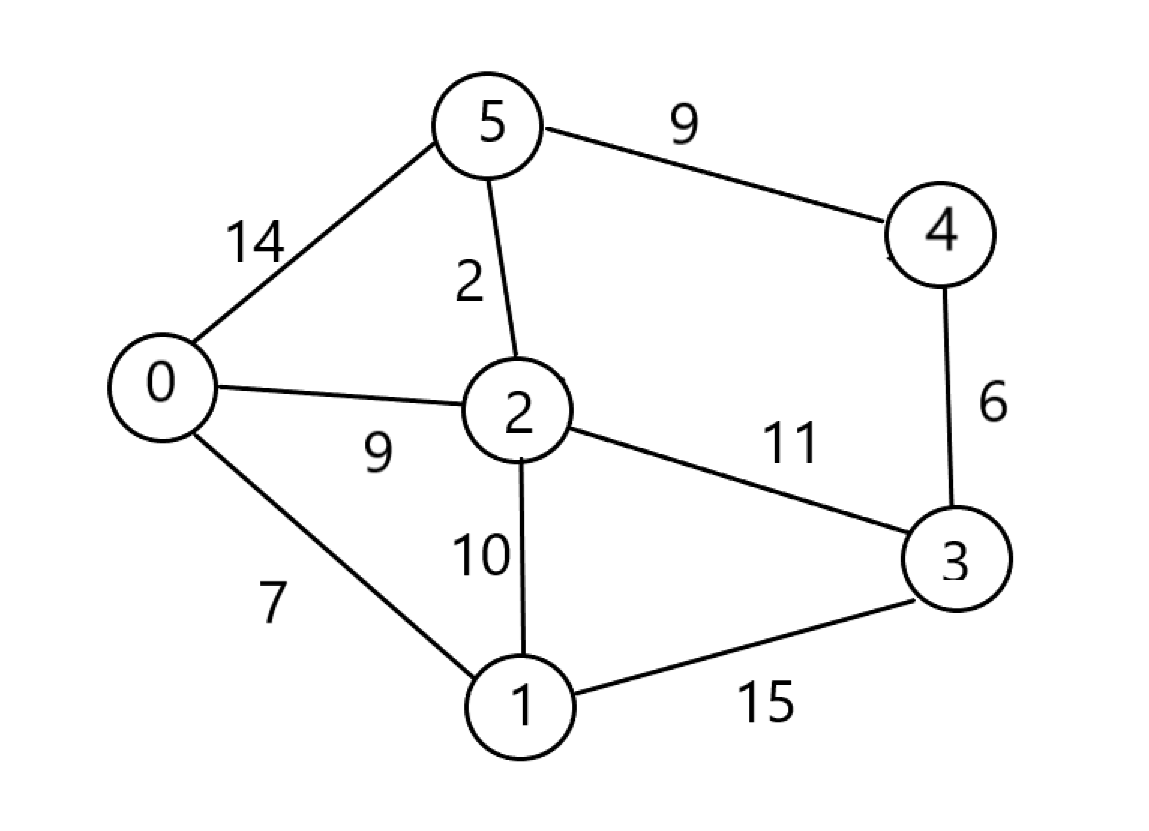

The above example has following parameters - \
`nodes = 6`

`connections = [[1,2,5], [0,2,3], [0,1,5,3], [1,2,4], [3,5], [0,2,4]] `

`weights = [[7,9,14], [7,10,15], [9,10,2,11], [15,11,6], [6,9], [14,2,9]]`

In each of the defined parameters, first element corresponds to node 0, second to node 1 and so on. 

In [127]:
nodes = 6
connections = [[1,2,5], [0,2,3], [0,1,5,3], [1,2,4], [3,5], [0,2,4]]
weights = [[7,9,14], [7,10,15], [9,10,2,11], [15,11,6], [6,9], [14,2,9]]

graph1 = Graph(nodes, connections, weights)
distance, opt_path = graph1.djikstra(0, 4)

print('Minimum distance is', distance)
print('Optimal path is', opt_path)

Minimum distance is 20
Optimal path is [0, 2, 5, 4]


# Important variables
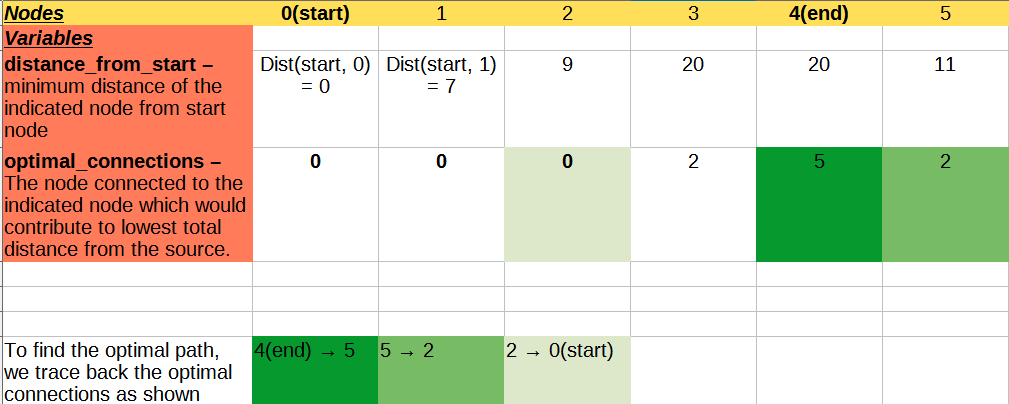
